# Introduction 

## Trip Advisor Hotel Reviews

### About this dataset
- Hotels play a crucial role in traveling and with the increased access to information new pathways of selecting the best ones emerged.
- With this dataset, consisting of 20k reviews crawled from Tripadvisor, you can explore what makes a great hotel and maybe even use this model in your travels!


# Work plan ❤️

- 1-  Analyze and explore data 🤝
- 2- Cleaning the texts
- 3- Building a Machine Learning Model / classification
- 4- Build DNN Algorithm for Sentimentant analysis/ TensorFlow 



In [1]:
#Importing the basic librarires fot analysis

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")  #using style ggplot

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
import re

In [2]:
#Importing the dataset
df =pd.read_csv("../input/trip-advisor-hotel-reviews/tripadvisor_hotel_reviews.csv")


# look the data set
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [3]:
# looking the shape DataSet
df.shape

(20491, 2)

- We have 20K Reviews

In [4]:
#Checking the dtypes of all the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [5]:
#checking null value 
df.isna().sum()

Review    0
Rating    0
dtype: int64

- No any missing value

In [6]:
# look  describe data set
df["Rating"].describe().round(2)

count    20491.00
mean         3.95
std          1.23
min          1.00
25%          3.00
50%          4.00
75%          5.00
max          5.00
Name: Rating, dtype: float64

- The average a round 4 , it is good

In [7]:
# any duplicate data 
df.duplicated().sum()

0

- No any duplicate data 

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


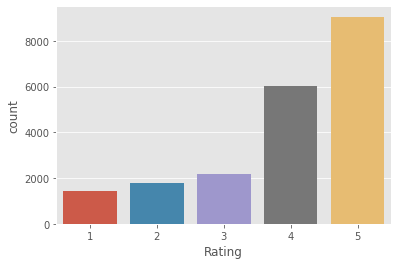

In [8]:
# how much percentage rating in the dataset

sns.countplot(df['Rating'])
plt.show()

### The percentage rating
- 5 = 44%
- 4 = 30%
- 3 = 10%
- 2 = 9%
- 1 = 7% 

In [9]:
# Length of word in sentence
df['Length'] = df['Review'].apply(len)
df.head()

,Review,Rating,Length
0,nice hotel expensive parking got good deal sta...,4,593
1,ok nothing special charge diamond member hilto...,2,1689
2,nice rooms not 4* experience hotel monaco seat...,3,1427
3,"unique, great stay, wonderful time hotel monac...",5,600
4,"great stay great stay, went seahawk game aweso...",5,1281


In [10]:
# look  describe data set
df["Length"].describe().round(2)

count    20491.0
mean       724.9
std        689.1
min         44.0
25%        339.0
50%        537.0
75%        859.0
max      13501.0
Name: Length, dtype: float64

<AxesSubplot:xlabel='Rating', ylabel='Length'>

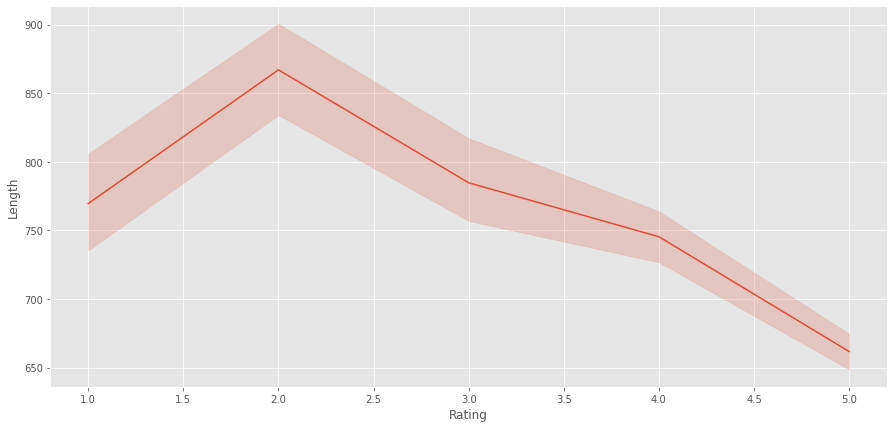

In [11]:
# graph what the the relationship between Rating and Length

plt.figure(figsize=(15,7))
sns.lineplot(data=df,x="Rating", y="Length")

In [12]:
px.scatter(df,x="Rating",y="Length", color="Rating")

- I see the length reviews has effect in the rating 

In [13]:
df_5=df[df["Rating"]==5]
df_5

,Review,Rating,Length
3,"unique, great stay, wonderful time hotel monac...",5,600
4,"great stay great stay, went seahawk game aweso...",5,1281
5,love monaco staff husband stayed hotel crazy w...,5,1002
6,"cozy stay rainy city, husband spent 7 nights m...",5,748
8,"hotel stayed hotel monaco cruise, rooms genero...",5,419
...,...,...,...
20473,best best reason affordable better hotels city...,5,152
20476,"night not trust not disappointed stay hotel, s...",5,1082
20480,great play stay stay loyal inn package deal ha...,5,256
20482,great choice wife chose best western quite bit...,5,716


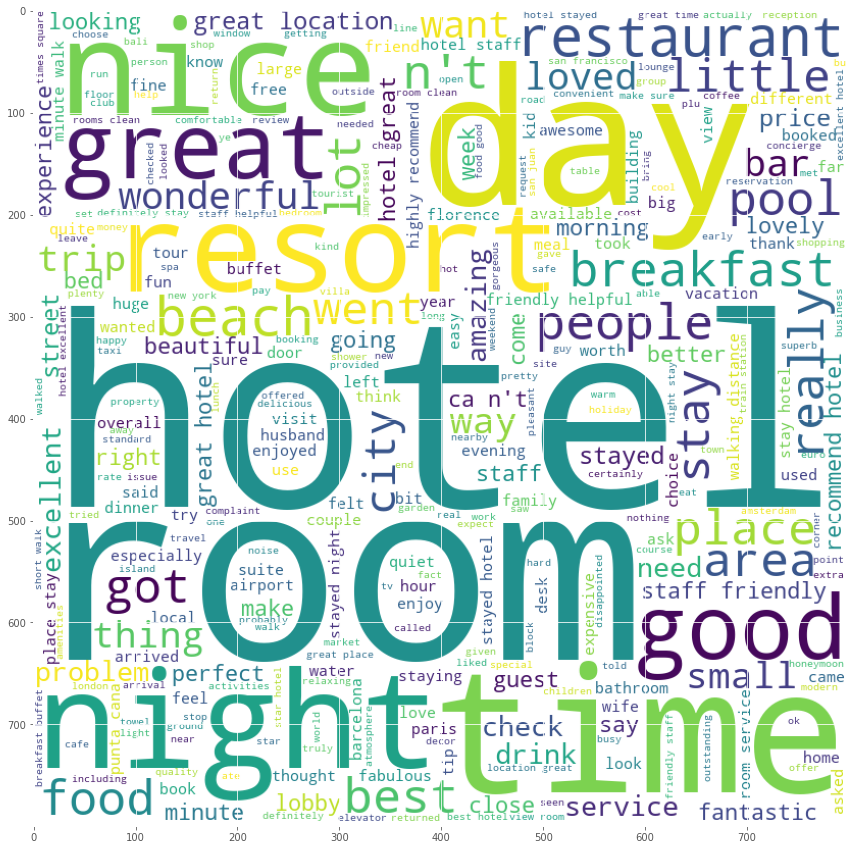

In [14]:
# the highest work repeat in the review rating 5

plt.figure(figsize=(15,15))
wc1 = WordCloud(max_words=1000, min_font_size=10, 
                height=800,width=800,background_color="white").generate(' '.join(df_5['Review']))

plt.imshow(wc1)

### We see the people satisfy = rating 5 in this words 
- In general the hotel - room - night  - beach - restaurant and food and drink - bed - pool  - locations. 


In [15]:
df_4=df[df["Rating"]==4]
df_4

,Review,Rating,Length
0,nice hotel expensive parking got good deal sta...,4,593
7,"excellent staff, housekeeping quality hotel ch...",4,597
11,nice value seattle stayed 4 nights late 2007. ...,4,364
12,nice hotel good location hotel kimpton design ...,4,569
14,"great hotel night quick business trip, loved l...",4,202
...,...,...,...
20475,good stay spent night pacific northwest/northe...,4,441
20477,nice hotel pioneer square area stayed late aug...,4,454
20478,"just fine, hotel located pioneer square just q...",4,727
20483,good bed clean convenient just night happy sta...,4,420


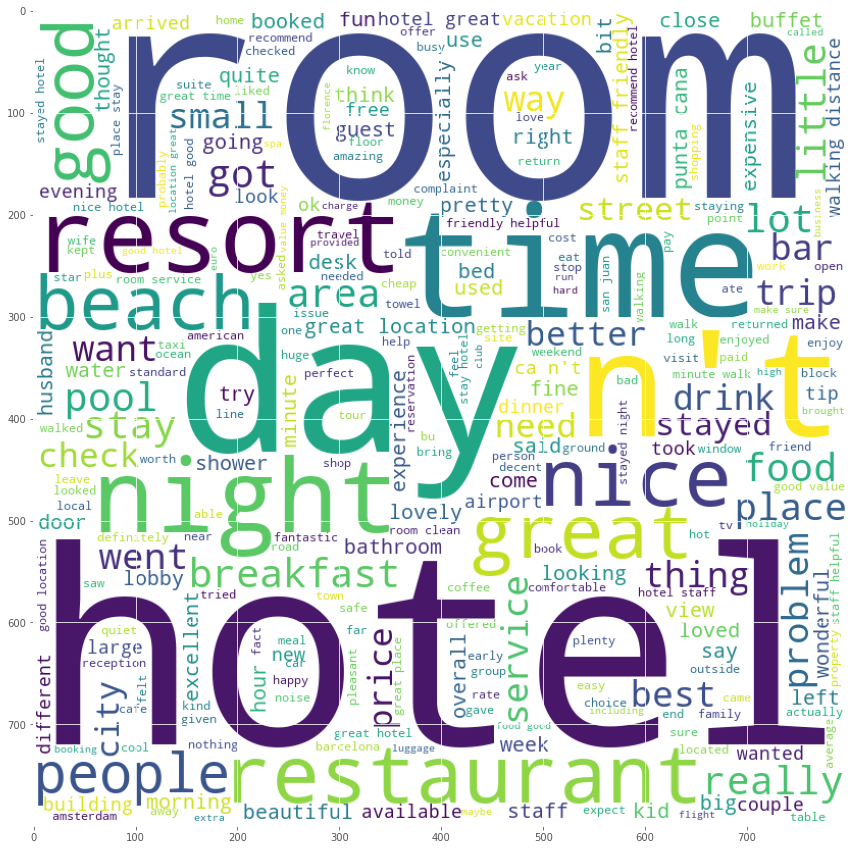

In [16]:
# the highest work repeat in the review rating 4

plt.figure(figsize=(15,15))
wc2 = WordCloud(max_words=1000, min_font_size=10, 
                height=800,width=800,background_color="white").generate(' '.join(df_4['Review']))

plt.imshow(wc2)

### We see the people satisfy = rating 4  in this words the same rating 5 but plus ...
- beautiful hotel - staff friendly - service - street.


In [17]:
df_3=df[df["Rating"]==3]
df_3

,Review,Rating,Length
2,nice rooms not 4* experience hotel monaco seat...,3,1427
13,nice hotel not nice staff hotel lovely staff q...,3,417
19,hmmmmm say really high hopes hotel monaco chos...,3,1025
25,"n't mind noise place great, read reviews noise...",3,482
27,met expectations centrally located hotel block...,3,538
...,...,...,...
20406,good good great location new clean modern bath...,3,376
20408,"ok ok. room clean tidy, staff friendly, good h...",3,165
20419,"nice try stayed hotel day grand opening, booke...",3,699
20446,"ok short stay booked hotel night stopover, sin...",3,566


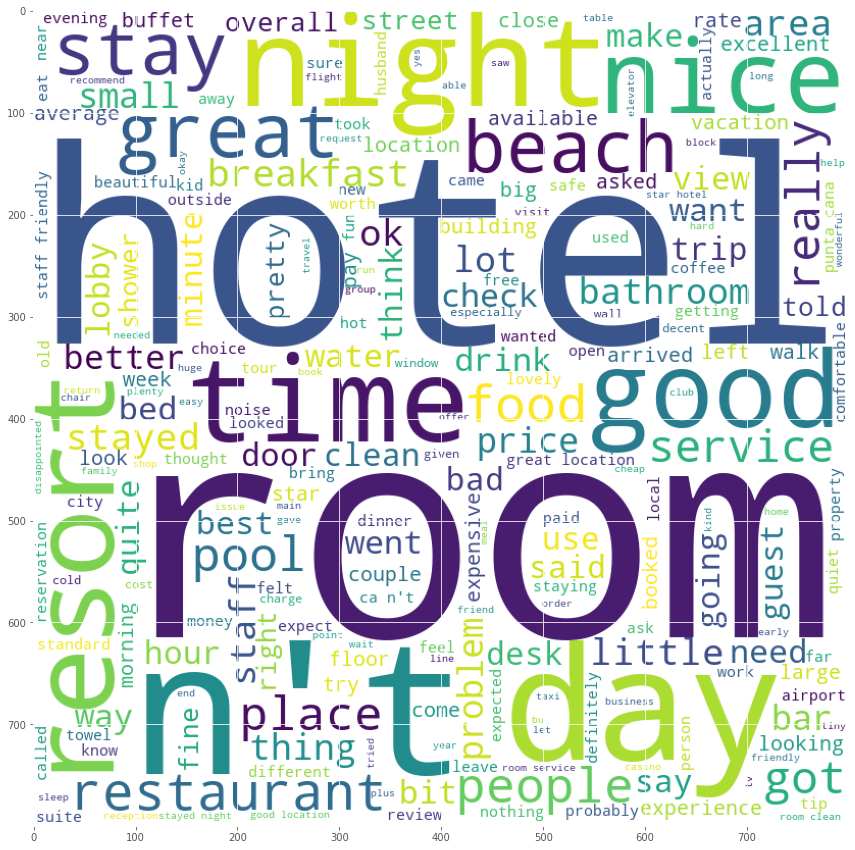

In [18]:
# the highest work repeat in the review rating 3

plt.figure(figsize=(15,15))
wc3 = WordCloud(max_words=1000, min_font_size=10, 
                height=800,width=800,background_color="white").generate(' '.join(df_3['Review']))

plt.imshow(wc3)

In [19]:
df_2=df[df["Rating"]==2]
df_2

,Review,Rating,Length
1,ok nothing special charge diamond member hilto...,2,1689
10,"poor value stayed monaco seattle july, nice ho...",2,333
16,disappointed say anticipating stay hotel monac...,2,1662
24,great location need internally upgrade advanta...,2,250
33,good location poor cleanliness warwick hotel g...,2,576
...,...,...,...
20481,ok price look hotel ok little run average clea...,2,247
20484,deceptive staff deceptive desk staff claiming ...,2,695
20485,not impressed unfriendly staff checked asked h...,2,616
20488,"ok just looks nice modern outside, desk staff ...",2,443


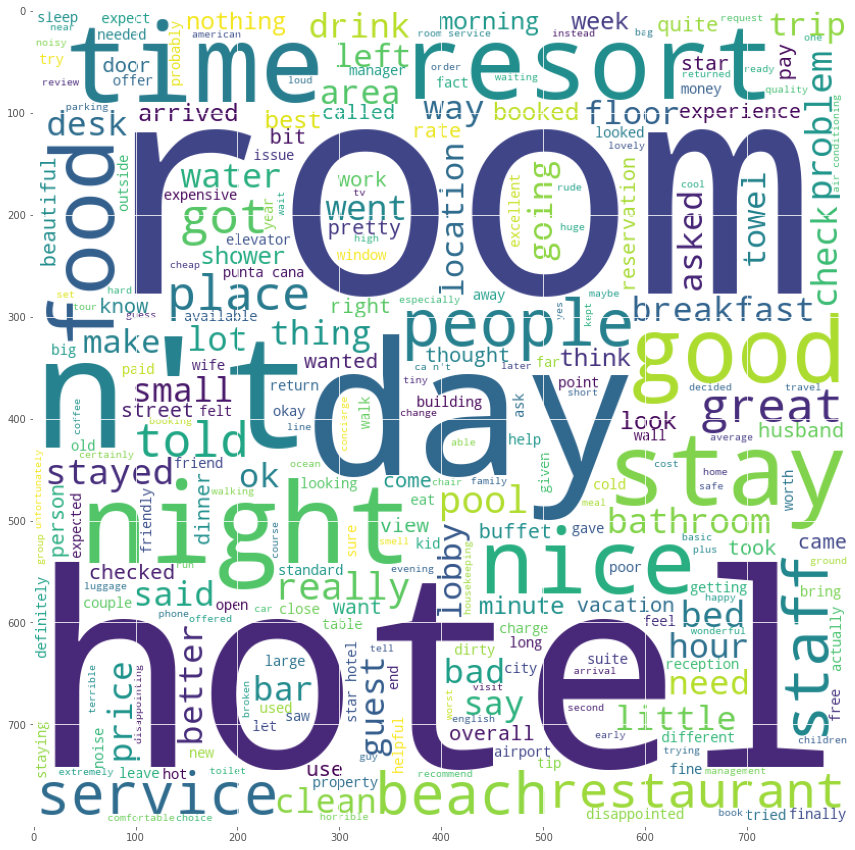

In [20]:
# the highest work repeat in the review rating 2

plt.figure(figsize=(15,15))
wc4 = WordCloud(max_words=1000, min_font_size=10, 
                height=800,width=800,background_color="white").generate(' '.join(df_2['Review']))

plt.imshow(wc4)

#### We see the people unsatisfied = rating 2  in this words the same rating 5 & 4 but plus ...
- Hotel - staff - beach - srevice - disk - stay - shower

In [21]:
df_1=df[df["Rating"]==1]
df_1

,Review,Rating,Length
15,horrible customer service hotel stay february ...,1,1411
32,"noise airconditioner-a standard, arranged stay...",1,614
40,"bad choice, booked hotel hot wire called immed...",1,861
65,"hated inn terrible, room-service horrible staf...",1,133
69,ace grunge lives does mold mildew tiny bed met...,1,84
...,...,...,...
20421,worst sleep hip tooooo hip nite club building ...,1,342
20460,"june 08 stay stayed hotel june 6/6-6/8/08, rea...",1,682
20465,not stay hotel brought group february worst ho...,1,305
20467,returning la concha nightmare surprising hotel...,1,460


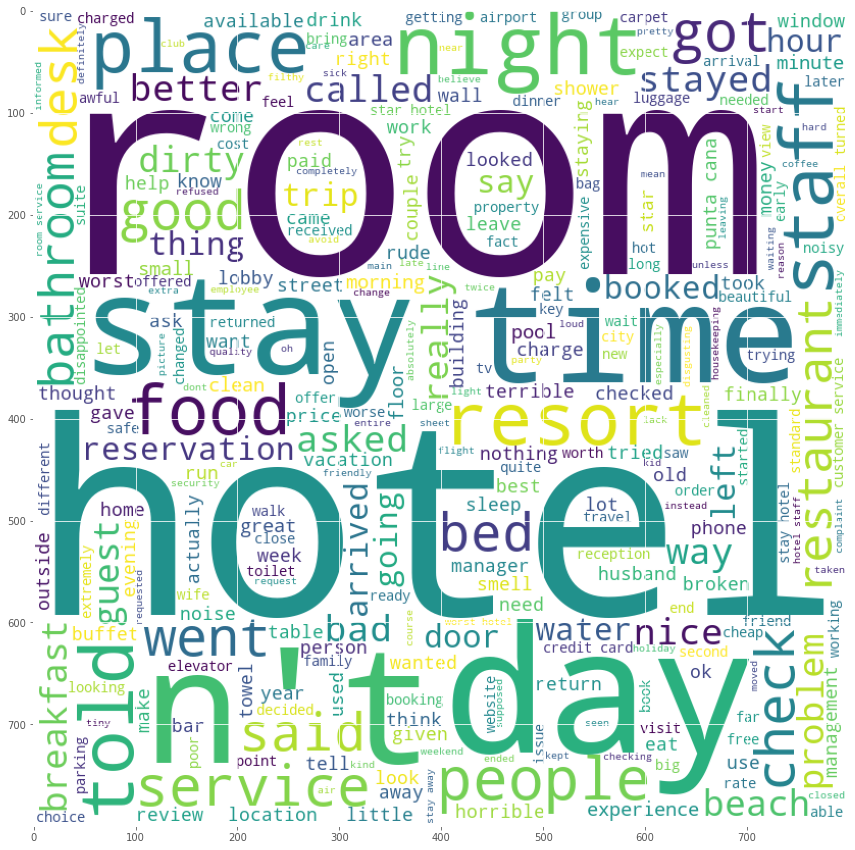

In [22]:
# the highest work repeat in the review rating 2

plt.figure(figsize=(15,15))
wc5 = WordCloud(max_words=1000, min_font_size=10, 
                height=800,width=800,background_color="white").generate(' '.join(df_1['Review']))

plt.imshow(wc5)

### We see the people unsatisfied = rating 1  in this words the same rating 5 & 4 but plus ...
- room  - hotel - place - staff - door - check in - sleep - toilet - resort -water.


# Analysis Results😃😃😃

#### We have 20K Reviews in the hotel and the Rating Reviews from 1 to 5

##### The percentage rating in the data set
- 5 = 44%
- 4 = 30%
- 3 = 10%
- 2 = 9%
- 1 = 7%


### I see the length reviews has effect in the rating.

## Rating  5 = 44% -> satisfy 
#### We see the people satisfy = rating 5 in this words
- In general the hotel - room - night - beach - restaurant and food and drink - bed - pool - locations.

## Rating  4 = 30% -> satisfy 

#### We see the people satisfy = rating 4 in this words the same rating 5 but plus ...
- beautiful hotel - staff friendly - service - street.


## Rating  2 = 9% -> unsatisfied 
#### We see the people unsatisfied = rating 2 in this words the same rating 5 & 4 but plus ...
- Hotel - staff - beach - srevice - disk - stay - shower

## Rating  1 = 7% -> unsatisfied 
#### We see the people unsatisfied = rating 1 in this words the same rating 5 & 4 but plus ...
- room - hotel - place - staff - door - check in - sleep - toilet - resort -water.


## I see around 75 % from visitors satisfied 



# 2- Making clean text for ML & TF

In [23]:
df.head()

,Review,Rating,Length
0,nice hotel expensive parking got good deal sta...,4,593
1,ok nothing special charge diamond member hilto...,2,1689
2,nice rooms not 4* experience hotel monaco seat...,3,1427
3,"unique, great stay, wonderful time hotel monac...",5,600
4,"great stay great stay, went seahawk game aweso...",5,1281


In [24]:
# first review
a=df.iloc[0,0]
a

'nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,  '

- First I want making clean the first review and I will make for loop or Function

In [25]:
# import library for Natural Language Toolkit

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


In [26]:
# remove any symbol and cover letter to lowercase

a=re.sub('[^a-zA-Z0-9]',' ',a)
a=a.lower().split()
a

['nice',
 'hotel',
 'expensive',
 'parking',
 'got',
 'good',
 'deal',
 'stay',
 'hotel',
 'anniversary',
 'arrived',
 'late',
 'evening',
 'took',
 'advice',
 'previous',
 'reviews',
 'did',
 'valet',
 'parking',
 'check',
 'quick',
 'easy',
 'little',
 'disappointed',
 'non',
 'existent',
 'view',
 'room',
 'room',
 'clean',
 'nice',
 'size',
 'bed',
 'comfortable',
 'woke',
 'stiff',
 'neck',
 'high',
 'pillows',
 'not',
 'soundproof',
 'like',
 'heard',
 'music',
 'room',
 'night',
 'morning',
 'loud',
 'bangs',
 'doors',
 'opening',
 'closing',
 'hear',
 'people',
 'talking',
 'hallway',
 'maybe',
 'just',
 'noisy',
 'neighbors',
 'aveda',
 'bath',
 'products',
 'nice',
 'did',
 'not',
 'goldfish',
 'stay',
 'nice',
 'touch',
 'taken',
 'advantage',
 'staying',
 'longer',
 'location',
 'great',
 'walking',
 'distance',
 'shopping',
 'overall',
 'nice',
 'experience',
 'having',
 'pay',
 '40',
 'parking',
 'night']

In [27]:
# dowmload the stopword from nlit library 
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
# show what the stopwords 

sw=set(stopwords.words('english'))
print(sw)

{'has', 'each', 'o', 'between', 'while', 'too', 'myself', 'the', 'to', 'hasn', 'your', 'at', 'is', 'no', 'shan', 'their', "hasn't", 'mustn', 'you', 'isn', 'our', 'now', 'ours', 'than', 'up', 'm', 'these', 'y', 'there', 'haven', 'them', 'themselves', "doesn't", 'as', 'in', 'so', "it's", "hadn't", "wasn't", 'ain', "wouldn't", 'both', 'from', 'he', 'few', 'above', 'yourselves', 'other', 're', 'against', 'which', 'some', 'of', 'am', 'been', "haven't", 'itself', "she's", "couldn't", 'shouldn', 'here', 'wouldn', 't', 'until', 'then', 'his', 'because', 'be', 'but', "should've", "mustn't", 'does', 'only', "shan't", "that'll", 'how', 'own', 'had', 'for', 'nor', "weren't", 'him', 'we', "you're", 'my', 'doesn', "mightn't", 'on', "you'd", "didn't", 'theirs', 'a', 'couldn', 'why', 'what', 'it', 'can', 'i', 'll', 'if', 's', 'any', 'will', 'again', 'mightn', 'ourselves', 'about', 'down', 'an', 'are', 'won', "shouldn't", 'and', "needn't", 'was', 'once', 'aren', 'before', 'having', 'very', 'himself', '

In [29]:
# made loop for clean reviews - based on the stopwords

clean_word=[i for i in a if not i in sw]
clean_word

['nice',
 'hotel',
 'expensive',
 'parking',
 'got',
 'good',
 'deal',
 'stay',
 'hotel',
 'anniversary',
 'arrived',
 'late',
 'evening',
 'took',
 'advice',
 'previous',
 'reviews',
 'valet',
 'parking',
 'check',
 'quick',
 'easy',
 'little',
 'disappointed',
 'non',
 'existent',
 'view',
 'room',
 'room',
 'clean',
 'nice',
 'size',
 'bed',
 'comfortable',
 'woke',
 'stiff',
 'neck',
 'high',
 'pillows',
 'soundproof',
 'like',
 'heard',
 'music',
 'room',
 'night',
 'morning',
 'loud',
 'bangs',
 'doors',
 'opening',
 'closing',
 'hear',
 'people',
 'talking',
 'hallway',
 'maybe',
 'noisy',
 'neighbors',
 'aveda',
 'bath',
 'products',
 'nice',
 'goldfish',
 'stay',
 'nice',
 'touch',
 'taken',
 'advantage',
 'staying',
 'longer',
 'location',
 'great',
 'walking',
 'distance',
 'shopping',
 'overall',
 'nice',
 'experience',
 'pay',
 '40',
 'parking',
 'night']

In [30]:
# now I need make sentence - list 
sen=' '.join(clean_word)
sen

'nice hotel expensive parking got good deal stay hotel anniversary arrived late evening took advice previous reviews valet parking check quick easy little disappointed non existent view room room clean nice size bed comfortable woke stiff neck high pillows soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway maybe noisy neighbors aveda bath products nice goldfish stay nice touch taken advantage staying longer location great walking distance shopping overall nice experience pay 40 parking night'

In [31]:
# defined function for clean all reviews in the data set


def text_preprocessing(a):
  a=re.sub('[^a-zA-Z]',' ',a)
  a=a.lower().split()
  ps=PorterStemmer()
  clean_word=[ps.stem(i) for i in a if not i in sw]
  sen=' '.join(clean_word)
  return sen

In [32]:
# add new column about the reviews after cleaning

df['clean_word']=df["Review"].apply(text_preprocessing)
df.head()


,Review,Rating,Length,clean_word
0,nice hotel expensive parking got good deal sta...,4,593,nice hotel expens park got good deal stay hote...
1,ok nothing special charge diamond member hilto...,2,1689,ok noth special charg diamond member hilton de...
2,nice rooms not 4* experience hotel monaco seat...,3,1427,nice room experi hotel monaco seattl good hote...
3,"unique, great stay, wonderful time hotel monac...",5,600,uniqu great stay wonder time hotel monaco loca...
4,"great stay great stay, went seahawk game aweso...",5,1281,great stay great stay went seahawk game awesom...


In [33]:
# Length of word in sentence
df['Length 2'] = df['clean_word'].apply(len)
df.head()

,Review,Rating,Length,clean_word,Length 2
0,nice hotel expensive parking got good deal sta...,4,593,nice hotel expens park got good deal stay hote...,481
1,ok nothing special charge diamond member hilto...,2,1689,ok noth special charg diamond member hilton de...,1407
2,nice rooms not 4* experience hotel monaco seat...,3,1427,nice room experi hotel monaco seattl good hote...,1174
3,"unique, great stay, wonderful time hotel monac...",5,600,uniqu great stay wonder time hotel monaco loca...,506
4,"great stay great stay, went seahawk game aweso...",5,1281,great stay great stay went seahawk game awesom...,1058


In [34]:
df.describe().round(2)

,Rating,Length,Length 2
count,20491.00,20491.0,20491.00
mean,3.95,724.9,597.84
std,1.23,689.1,564.26
min,1.00,44.0,31.00
25%,3.00,339.0,282.00
50%,4.00,537.0,444.00
75%,5.00,859.0,709.00
max,5.00,13501.0,11189.00


- We see the length reviews less

# 3- Building a Machine Learning Model / classification


In [35]:
#Importing the basic librarires for building model - classification

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,r2_score


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import  MLPClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.feature_extraction.text import CountVectorizer 

from sklearn.preprocessing import LabelEncoder,StandardScaler


In [36]:
# now we need change the new word to number - array using CountVectorizer

cv=CountVectorizer()
X=cv.fit_transform(df["clean_word"]).toarray()
y=df["Rating"]

In [37]:
# the shape
print("X shape: ", X.shape)
print("y: shape ", y.shape)

X shape:  (20491, 35692)
y: shape  (20491,)


In [38]:
# split the data train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (15368, 35692)
X Test  :  (5123, 35692)
Y Train :  (15368,)
Y Test  :  (5123,)


In [39]:
#Defined object from library classification 

LR = LogisticRegression()
DTR = DecisionTreeClassifier()
RFR = RandomForestClassifier()
KNR = KNeighborsClassifier()
NB = MultinomialNB()

In [40]:
# make for loop for classification 

li = [LR,DTR,RFR,KNR,NB]
d = {}
for i in li:
    i.fit(X_train,y_train)
    ypred = i.predict(X_test)
    print(i,":",accuracy_score(y_test,ypred)*100)
    d.update({str(i):i.score(X_test,y_test)*100})

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression() : 58.65703689244584
DecisionTreeClassifier() : 45.36404450517275
RandomForestClassifier() : 51.33710716377122
KNeighborsClassifier() : 45.77396056997853
MultinomialNB() : 58.325200078079256


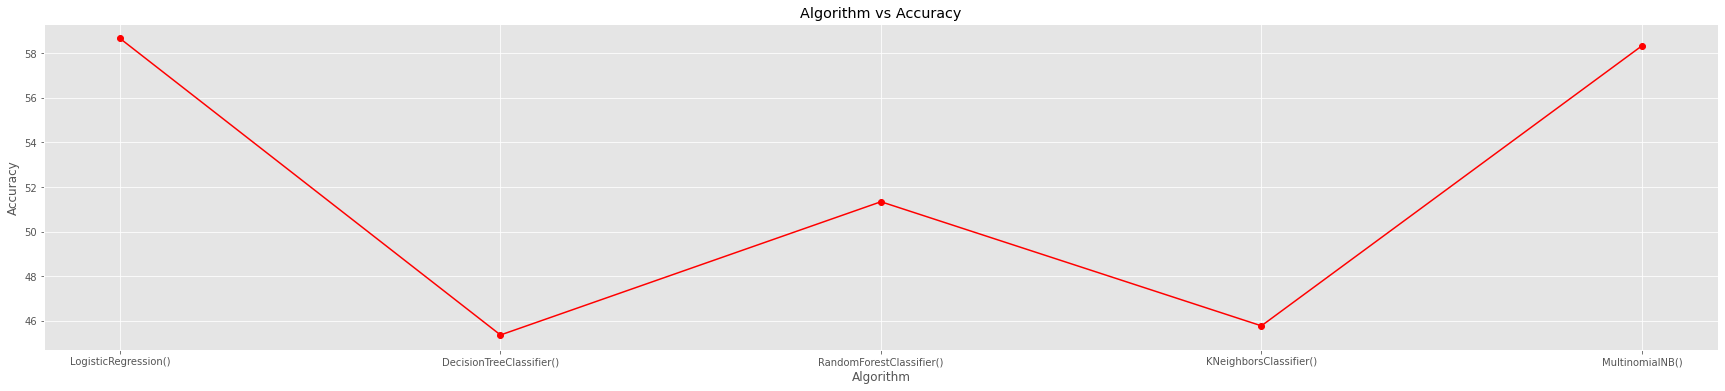

In [41]:
# make graph about Accuracy

plt.figure(figsize=(30, 6))
plt.title("Algorithm vs Accuracy")
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.plot(d.keys(),d.values(),marker='o',color='red')
plt.show()

# 4- Build DNN Algorithm for Sentimentant analysis/ TensorFlow 


In [42]:
#Importing the basic librarires for Build DNN Algorithm for Sentimentant analysis / TensorFlow 

import tensorflow as tf
from tensorflow import keras

In [43]:
#build model

model=keras.Sequential()
model.add(keras.layers.Dense(512,input_dim=1566,activation=tf.nn.sigmoid))
model.add(keras.layers.Dense(128,activation=tf.nn.sigmoid))
model.add(keras.layers.Dense(1,activation=tf.nn.sigmoid))

2022-06-30 20:20:34.534148: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [44]:
#model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
#model.fit(X_train,y_train,epochs=8)
#model.evaluate(x_test,y_test)

- soon I will make update in TF

- .80

# Model Selection Results 😃😃😃

- In ML-  LogisticRegression around 58 %

- In TF Soon I will make update .😃😃😃


# Notes 😃😃😃😃

- Thank for reading my analysis and my regression. 😃😃😃😃

- If you any questions or advice me please write in the comment . ❤️❤️❤️❤️

- If anyone has a model with a higher percentage, please tell me 🤝🤝🤝


# Vote ❤️😃

- If you liked my work upvote me ,


# The End 🤝🎉🤝🎉